## 4.多项式函数拟合实验

In [18]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, nd, gluon
from mxnet.gluon import data as gdata, loss as gloss, nn

In [19]:
n_train, n_test, true_w, true_b = 100, 100, [1.2,-3.4, 5.6], 5
features = nd.random.normal(shape = (n_train + n_test, 1))
poly_features = nd.concat(features, nd.power(features, 2), nd.power(features, 3))

labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1] + true_w[2] * poly_features[:, 2] + true_b)
labels += nd.random.normal(scale = 0.01, shape = labels.shape)

In [20]:
features[:2],poly_features[:2], labels[:2]

(
 [[ 1.5589024 ]
  [-0.60619354]]
 <NDArray 2x1 @cpu(0)>,
 
 [[ 1.5589024   2.4301767   3.788408  ]
  [-0.60619354  0.36747062 -0.22275831]]
 <NDArray 2x3 @cpu(0)>,
 
 [19.821892   1.7826986]
 <NDArray 2 @cpu(0)>)

In [21]:
# 作图函数
def semilogy(x_vals, y_vals, x_labels, y_labels, x2_vals = None, y2_vals = None, legend = None, figsize = (3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_labels)
    d2l.plt.ylabel(y_labels)
    d2l.plt.semilogy(x_vals, y_vals)

    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle = ':')
        d2l.plt.legend(legend)

In [22]:
num_epochs, loss = 100, gloss.L2Loss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels), batch_size, shuffle = True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})

    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features), test_labels).mean().asscalar())

    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net[0].weight.data().asnumpy(),
              '\nbias:', net[0].bias.data().asnumpy())

final epoch: train loss 0.0006501656 test loss 0.00058433233
weight: [[ 1.1472526 -3.3853316  5.614139 ]] 
bias: [4.978384]


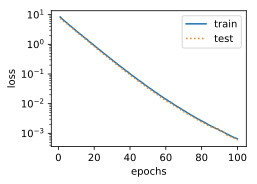

In [23]:
# 三阶多项式函数拟合(同阶)
fit_and_plot(poly_features[:n_train,  :], poly_features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch: train loss 131.15274 test loss 86.636826
weight: [[20.876747]] 
bias: [-0.65764093]


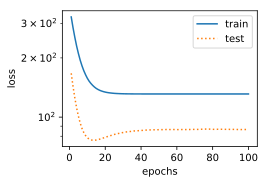

In [24]:
#线性函数拟合(欠拟合)
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch: train loss 0.7051816 test loss 62.747074
weight: [[1.2799984 1.8447227 3.2840414]] 
bias: [0.95267797]


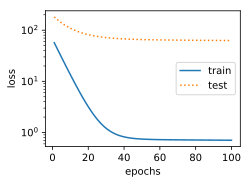

In [25]:
#训练样本不足(过拟合)
fit_and_plot(poly_features[:3, :], poly_features[n_train:, :], labels[:3], labels[n_train:])